 ## HIMANSHU TRIPATHI

##### Titanic Data Exploratory Data Analysis and Predict

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Data

In [2]:
df = pd.read_csv('titanic.csv',sep='\t')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data

In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


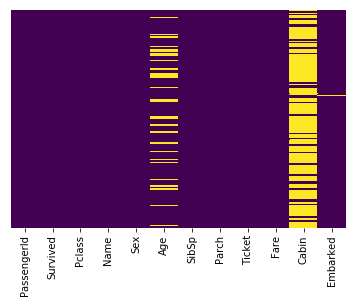

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

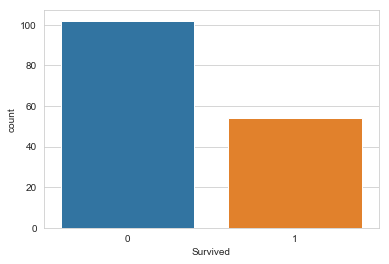

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

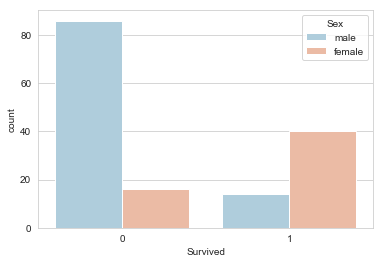

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

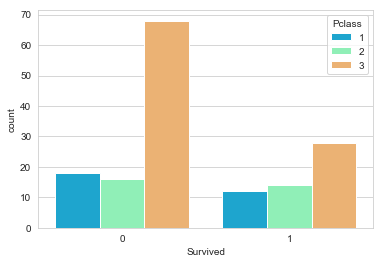

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df, palette='rainbow')

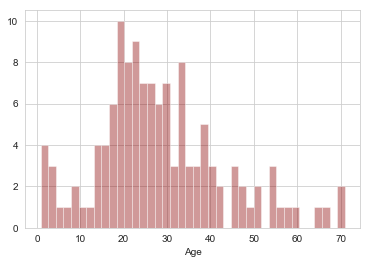

In [8]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

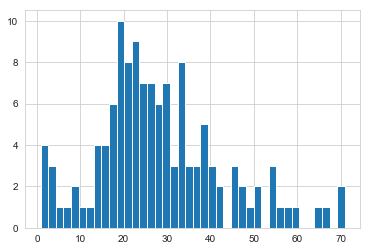

In [9]:
df['Age'].hist(bins=40)

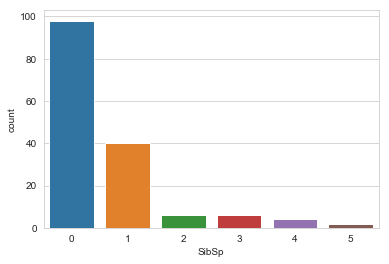

In [10]:
sns.countplot(x='SibSp',data=df)

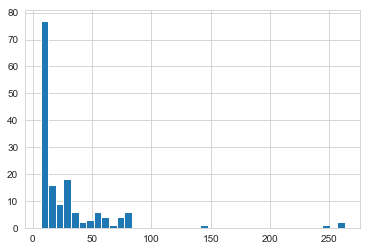

In [11]:
df['Fare'].hist(bins=40)

### Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

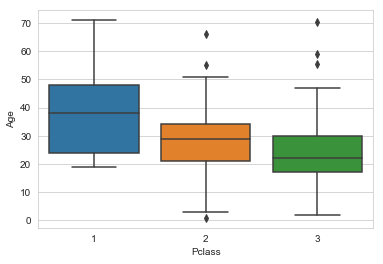

In [12]:
# plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [13]:
def age_change(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return 24  
    

In [14]:
df['Age'] = df[['Age','Pclass']].apply(age_change,axis=1)

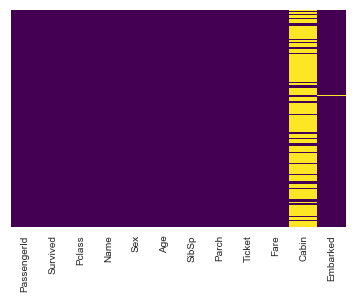

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df.drop('Cabin',axis=1,inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,24,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,24,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [18]:
df.dropna(inplace=True)

### Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
PassengerId    155 non-null int64
Survived       155 non-null int64
Pclass         155 non-null int64
Name           155 non-null object
Sex            155 non-null object
Age            155 non-null int64
SibSp          155 non-null int64
Parch          155 non-null int64
Ticket         155 non-null object
Fare           155 non-null float64
Embarked       155 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 14.5+ KB


In [20]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [22]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,24,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,24,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [24]:
df = pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,24,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,24,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


### Building a Logistic Model

### Train Test Split

In [25]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,24,1,0,7.2500,1,0,1
1,2,1,24,1,0,71.2833,0,0,0
2,3,3,24,0,0,7.9250,0,0,1
3,4,1,24,1,0,53.1000,0,0,1
4,5,3,24,0,0,8.0500,1,0,1


In [26]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1),
                                                  df['Survived'],test_size=0.30,
                                                  random_state=1)



In [29]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(108, 9)
(108,)
(47, 9)
(47,)


In [30]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
105,106,3,24,0,0,7.8958,1,0,1
136,137,1,24,0,2,26.2833,0,0,1
78,79,2,24,0,2,29.0000,1,0,1
18,19,3,24,1,0,18.0000,0,0,1
48,49,3,24,2,0,21.6792,1,0,0


### Training and Predicting

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
pred = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test,pred)

In [36]:
cm

array([[29,  3],
       [ 5, 10]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.8297872340425532

In [39]:
pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

### Check with some dummy data 

This Dummy data is from the data set and
I make a new data frame and then predict the result 

In [40]:
new_data = pd.DataFrame({
    'PassengerId':[1,2,3,4,5],
    'Pclass':[3,1,3,1,3],
    'Age':[22.0,38,26,35,35],
    'SibSp':[1,1,0,1,0],
    'Parch':[0,0,0,0,0],
    'Fare':[7.2500,71.2833,7.9250,53.1000,8.0500],
    'male':[1,0,0,0,1],
    'Q':[0,0,0,0,0],
    'S':[1,1,1,1,1]
    
})
new_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [41]:
model.predict(new_data)

array([0, 1, 1, 1, 0], dtype=int64)

# Accurate prediction !!!

### Using Support Vector Machine
#### we get over 95% accuracy

In [42]:
from sklearn.svm import SVC

In [44]:
s = SVC()
s.fit(X_test,y_test)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
pred = s.predict(X_test)

In [48]:
cm = confusion_matrix(y_test,pred)
cm

array([[32,  0],
       [ 2, 13]], dtype=int64)

In [50]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.9574468085106383